In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [19]:
df = pd.read_csv('Spreadsheets/box_score_all.csv')

In [20]:
print('Total number of rows in the dataset = {}'.format(df.shape[0]))
print('Total number of columns in the dataset = {}'.format(df.shape[1]))

Total number of rows in the dataset = 2460
Total number of columns in the dataset = 64


In [21]:
df.head()

,Date,assists,assistsTurnoverRatio,benchPoints,biggestLead,biggestLeadScore,biggestScoringRun,biggestScoringRunScore,blocks,blocksReceived,...,trueShootingAttempts,trueShootingPercentage,turnovers,turnoversTeam,turnoversTotal,twoPointersAttempted,twoPointersMade,twoPointersPercentage,Home/Away,Game ID
0,2022-10-18T19:30:00-04:00,16.0,1.142857,11.0,8.0,25-17,10.0,25-17,3.0,3.0,...,92.32,0.633666,14.0,0.0,14.0,46.0,27.0,0.586957,Away,22200001
1,2022-10-18T19:30:00-04:00,24.0,2.181818,34.0,16.0,110-126,10.0,25-17,3.0,3.0,...,94.32,0.667939,10.0,1.0,11.0,47.0,34.0,0.723404,Home,22200001
2,2022-10-18T22:00:00-04:00,23.0,1.045455,24.0,2.0,2-0,11.0,64-89,4.0,3.0,...,104.00,0.524038,21.0,1.0,22.0,53.0,30.0,0.566038,Away,22200002
3,2022-10-18T22:00:00-04:00,31.0,1.722222,41.0,27.0,64-91,13.0,64-91,3.0,4.0,...,109.12,0.563600,18.0,0.0,18.0,54.0,29.0,0.537037,Home,22200002
4,2022-10-19T19:00:00-04:00,21.0,1.166667,17.0,15.0,21-6,19.0,21-6,5.0,4.0,...,94.36,0.577575,18.0,0.0,18.0,56.0,31.0,0.553571,Away,22200003


### Reformatting Datetime

In [22]:
dates = df["Date"].str.slice(stop=10)

In [23]:
print(type(dates))

<class 'pandas.core.series.Series'>


In [24]:
dates = pd.to_datetime(dates, format='%Y-%m-%d')

In [25]:
dates

0      2022-10-18
1      2022-10-18
2      2022-10-18
3      2022-10-18
4      2022-10-19
          ...    
2455   2023-04-09
2456   2023-04-09
2457   2023-04-09
2458   2023-04-09
2459   2023-04-09
Name: Date, Length: 2460, dtype: datetime64[ns]

In [26]:
df['Date']

0       2022-10-18T19:30:00-04:00
1       2022-10-18T19:30:00-04:00
2       2022-10-18T22:00:00-04:00
3       2022-10-18T22:00:00-04:00
4       2022-10-19T19:00:00-04:00
                  ...            
2455    2023-04-09T15:30:00-04:00
2456    2023-04-09T15:30:00-04:00
2457    2023-04-09T15:30:00-04:00
2458    2023-04-09T15:30:00-04:00
2459    2023-04-09T15:30:00-04:00
Name: Date, Length: 2460, dtype: object

In [27]:
df['DatesF'] = dates

In [28]:
df['DatesF']

0      2022-10-18
1      2022-10-18
2      2022-10-18
3      2022-10-18
4      2022-10-19
          ...    
2455   2023-04-09
2456   2023-04-09
2457   2023-04-09
2458   2023-04-09
2459   2023-04-09
Name: DatesF, Length: 2460, dtype: datetime64[ns]

### Multilevel Dataframe

In [89]:
multi_df = df.set_index(['DatesF', 'Game ID'])

In [90]:
multi_df

Date  assists  assistsTurnoverRatio  \
DatesF     Game ID                                                              
2022-10-18 22200001  2022-10-18T19:30:00-04:00     16.0              1.142857   
           22200001  2022-10-18T19:30:00-04:00     24.0              2.181818   
           22200002  2022-10-18T22:00:00-04:00     23.0              1.045455   
           22200002  2022-10-18T22:00:00-04:00     31.0              1.722222   
2022-10-19 22200003  2022-10-19T19:00:00-04:00     21.0              1.166667   
...                                        ...      ...                   ...   
2023-04-09 22201228  2023-04-09T15:30:00-04:00     28.0              2.545455   
           22201229  2023-04-09T15:30:00-04:00     22.0              2.200000   
           22201229  2023-04-09T15:30:00-04:00     29.0              4.142857   
           22201230  2023-04-09T15:30:00-04:00     47.0              2.937500   
           22201230  2023-04-09T15:30:00-04:00     25.0              1.785714   

                     benchPoints  biggestLead biggestLeadScore  \
DatesF     Game ID                                               
2022-10-18 22200001         11.0          8.0            25-17   
           22200001         34.0         16.0          110-126   
           22200002         24.0          2.0              2-0   
           22200002         41.0         27.0            64-91   
2022-10-19 22200003         17.0         15.0             21-6   
...                          ...          ...              ...   
2023-04-09 22201228         35.0         14.0            63-77   
           22201229         53.0          6.0            59-53   
           22201229         40.0         11.0            17-28   
           22201230         88.0         59.0           150-91   
           22201230         21.0          0.0           150-91   

                     biggestScoringRun biggestScoringRunScore  blocks  \
DatesF     Game ID                                                      
2022-10-18 22200001               10.0                  25-17     3.0   
           22200001               10.0                  25-17     3.0   
           22200002               11.0                  64-89     4.0   
           22200002               13.0                  64-91     3.0   
2022-10-19 22200003               19.0                   21-6     5.0   
...                                ...                    ...     ...   
2023-04-09 22201228               13.0                   3-13     7.0   
           22201229               14.0                  59-53     5.0   
           22201229               14.0                  59-53     3.0   
           22201230               14.0                  46-23     6.0   
           22201230               12.0                  44-23     3.0   

                     blocksReceived  ...  timesTied  trueShootingAttempts  \
DatesF     Game ID                   ...                                    
2022-10-18 22200001             3.0  ...        7.0                 92.32   
           22200001             3.0  ...        7.0                 94.32   
           22200002             3.0  ...        2.0                104.00   
           22200002             4.0  ...        2.0                109.12   
2022-10-19 22200003             4.0  ...        4.0                 94.36   
...                             ...  ...        ...                   ...   
2023-04-09 22201228             4.0  ...        0.0                106.24   
           22201229             3.0  ...        8.0                110.56   
           22201229             5.0  ...        8.0                108.68   
           22201230             3.0  ...        0.0                103.04   
           22201230             6.0  ...        0.0                105.56   

                     trueShootingPercentage  turnovers  turnoversTeam  \
DatesF     Game ID                                                      
2022-10-18 22200001            

In [31]:
multi_df.loc['2022-10-18']['threePointersMade']

Game ID
22200001    13.0
22200001    12.0
22200002    10.0
22200002    16.0
Name: threePointersMade, dtype: float64

In [32]:
multi_df.loc['2022-10-18']['threePointersAttempted']

Game ID
22200001    34.0
22200001    35.0
22200002    40.0
22200002    45.0
Name: threePointersAttempted, dtype: float64

In [33]:
# test calculation for first day's percentage of three points 
day1_attempts = multi_df.loc['2022-10-18']['threePointersAttempted'].sum()
day1_makes = multi_df.loc['2022-10-18']['threePointersMade'].sum()
day1_percentage = day1_makes/day1_attempts
print(day1_percentage)

0.33116883116883117


In [26]:
# calculate all daily 3PT% of 2022-23 season
# list to hold daily 3PT% averages
daily_3PtP = []
# iterate through each game of season to collect 3PA and 3PM using unique date values in 'dates' series
# calculate the daily 3P% and append to global list
for d in dates.unique():
    daily_3PtM = multi_df.loc[d]['threePointersMade'].sum()
    daily_3PtA = multi_df.loc[d]['threePointersAttempted'].sum()
    daily_3PtP.append(daily_3PtM/daily_3PtA)

In [27]:
daily_3PtP

[0.33116883116883117,
 0.34577114427860695,
 0.2571428571428571,
 0.37534246575342467,
 0.40822784810126583,
 0.3156779661016949,
 0.34767025089605735,
 0.30952380952380953,
 0.36755952380952384,
 0.3853820598006645,
 0.35233160621761656,
 0.3770833333333333,
 0.35517241379310344,
 0.34549356223175964,
 0.36860068259385664,
 0.33467202141900937,
 0.42105263157894735,
 0.36125,
 0.3813084112149533,
 0.2872727272727273,
 0.3689892051030422,
 0.34782608695652173,
 0.32592592592592595,
 0.3413284132841328,
 0.35929203539823007,
 0.38620689655172413,
 0.33832976445396146,
 0.38968481375358166,
 0.3776824034334764,
 0.3516483516483517,
 0.3412384716732543,
 0.3561643835616438,
 0.35765124555160144,
 0.33035714285714285,
 0.3403361344537815,
 0.3724304715840387,
 0.33263157894736844,
 0.3754646840148699,
 0.3446601941747573,
 0.3591654247391952,
 0.3744493392070485,
 0.35023584905660377,
 0.41975308641975306,
 0.36522911051212936,
 0.3490364025695932,
 0.33648393194706994,
 0.3583617747440273

## Plotting

### Tracking Moving Average

7 Day moving average

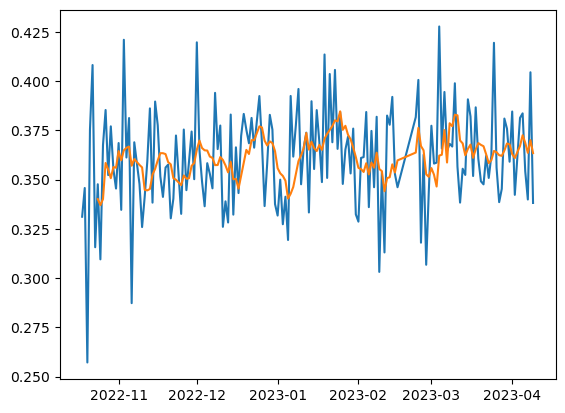

In [31]:
# define moving average window
window_size = 7

# calculate MA using pandas.rolling().mean method
rolling_mean = pd.Series(daily_3PtP).rolling(window_size).mean()

# plot daily average of 3P%
sns.lineplot(x=dates.unique(), y=daily_3PtP)

# plot moving average of 3P%
sns.lineplot(x=dates.unique(), y=rolling_mean)

#show plot
plt.show()

### Relative Scatter Plot

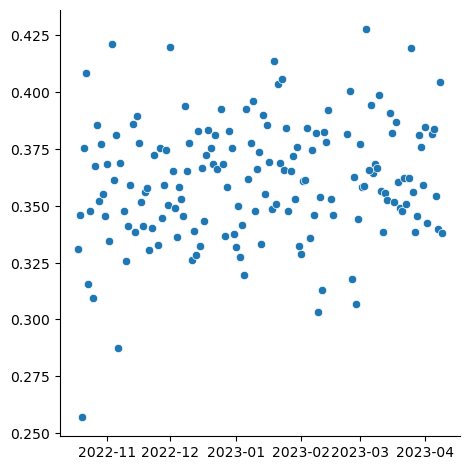

In [83]:
sns.relplot(x=dates.unique(), y=daily_3PtP)

### Regression Plot
Parameters of a regression plot necessarily has us take a different approach when finding the regression line of these daily 3P% makes

In [40]:
# creating a new dataframe onject using daily 3P% list
daily_3ptp_df = pd.DataFrame(daily_3PtP)
# modifying name of column
daily_3ptp_df = daily_3ptp_df.rename(columns={0: 'Daily 3PtP'})

In [41]:
daily_3ptp_df

,Daily 3PtP
0,0.331169
1,0.345771
2,0.257143
3,0.375342
4,0.408228
...,...
159,0.383681
160,0.354286
161,0.339926
162,0.404545


<AxesSubplot: ylabel='Daily 3PtP'>

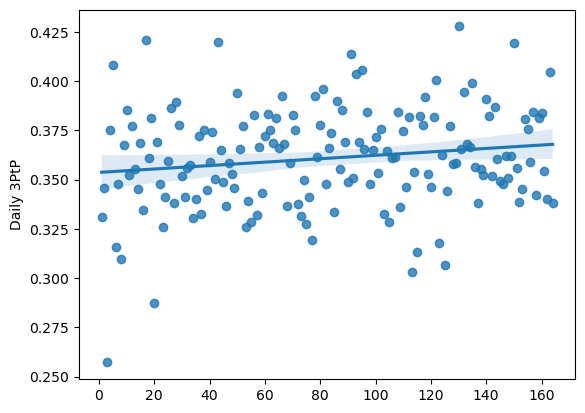

In [46]:
# scatter+regression plot of daily 3P%
sns.regplot(x=(daily_3ptp_df.index + 1), y='Daily 3PtP', data=daily_3ptp_df)

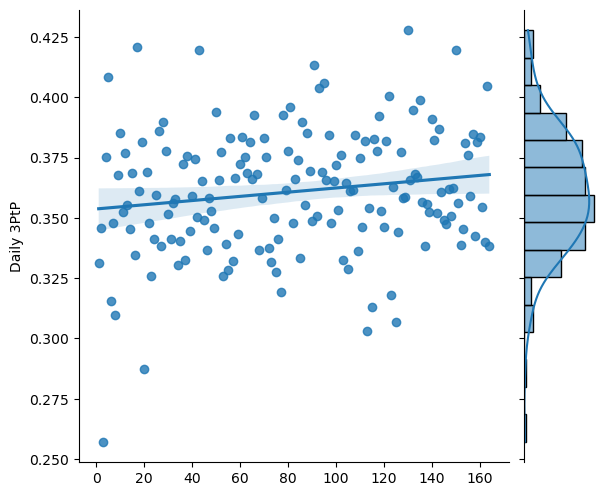

In [50]:
jp = sns.jointplot(x=(daily_3ptp_df.index + 1), y='Daily 3PtP', data=daily_3ptp_df, kind='reg')
jp.ax_marg_x.remove()
plt.show()

## Are some players more deserving of the "streaky" label than others?

In [1]:
# kelly oubre
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

player_id = 1626162 # Kelly Oubre's player ID
season = SeasonAll.default # 2022-23 NBA season

gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season)
ko_df = gamelog.get_data_frames()[0]

three_point_pct = ko_df['FG3_PCT']

In [82]:
print(season)

2022-23


In [17]:
ko_df['FG3_PCT']

0     0.000
1     0.429
2     0.000
3     0.250
4     0.500
5     0.571
6     0.500
7     0.000
8     0.444
9     0.300
10    0.500
11    0.500
12    0.000
13    0.000
14    0.250
15    0.167
16    0.167
17    0.375
18    0.250
19    0.300
20    0.385
21    0.375
22    0.250
23    0.429
24    0.400
25    0.200
26    0.400
27    0.000
28    0.429
29    0.000
30    0.143
31    0.556
32    0.143
33    0.000
34    0.400
35    0.538
36    0.091
37    0.143
38    0.364
39    0.400
40    0.455
41    0.500
42    0.429
43    0.200
44    0.167
45    0.500
46    0.333
47    0.333
Name: FG3_PCT, dtype: float64

In [16]:
ko_df['FG3_PCT'].value_counts()

0.000    8
0.500    6
0.429    4
0.250    4
0.400    4
0.143    3
0.167    3
0.200    2
0.333    2
0.375    2
0.300    2
0.444    1
0.571    1
0.556    1
0.538    1
0.091    1
0.364    1
0.455    1
0.385    1
Name: FG3_PCT, dtype: int64

In [9]:
ko_df['FG3_PCT'].count()

48

In [11]:
first_five = ko_df['FG3_PCT'].value_counts().head(5)

<AxesSubplot: ylabel='FG3_PCT'>

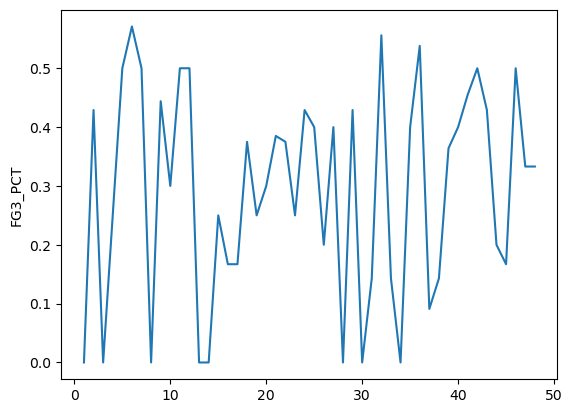

In [67]:
sns.lineplot(x=(ko_df.index+1), y='FG3_PCT', data=ko_df)

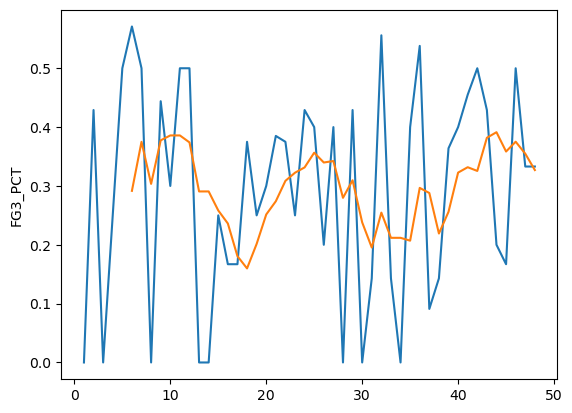

In [80]:
# define moving average window
window_size = 6

# calculate MA using pandas.rolling().mean method
rolling_mean = ko_df['FG3_PCT'].rolling(window_size).mean()

# plot daily average of 3P%
sns.lineplot(x=(ko_df.index+1), y='FG3_PCT', data=ko_df)

# plot moving average of 3P%
sns.lineplot(x=(ko_df.index+1), y=rolling_mean)

#show plot
plt.show()

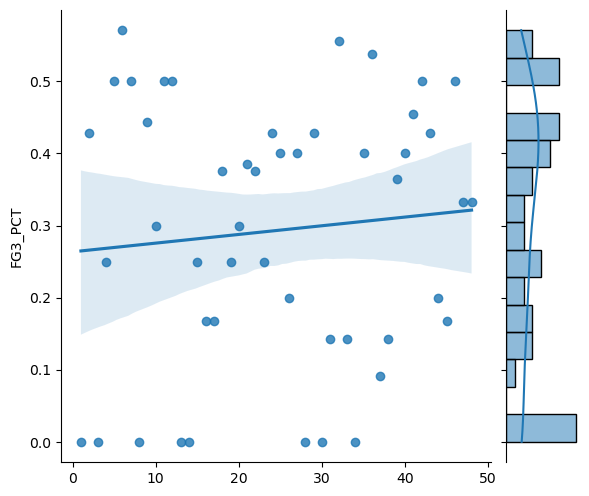

In [76]:
ko_jp = sns.jointplot(x=(ko_df.index+1), y='FG3_PCT', data=ko_df, kind='reg', marginal_kws=dict(bins=15),)
ko_jp.ax_marg_x.remove()
plt.show()